### This is Owen Monroe's Notebook for IS 567 Text Mining for the Project Progress Report
This notebook evaluates NER models and tagging, comparing the spacy NER model to my own hand-annotated data. The text data comes from downloaded files from the Hathi-Trust Digital Library. These texts are 19th Century Magazines from the publishers, The Society for the Diffusion of Useful Knowledge, the William and Robert Chambers, and the Society for the Diffusion of General and Christian Knowledge among the Chinese. 

In [1]:
# Loading the Spacy Model

import spacy



In [2]:
nlp = spacy.load('en_core_web_sm')

Document 1 Comparison: Clipping from Chambers's 'Information for the People' 1835 selection about France


In [3]:
with open("Useful_Knowledge_Texts/Clipped_Texts/Chambers_InfoForPeople_France_1835.txt", "r", encoding="utf-8") as text_file:
    text = text_file.read()

In [4]:
doc = nlp(text)

In [5]:
hand_annotated_data = []
with open("Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/Chambers_InfoForPeople_France_1835.txt.tsv", "r", encoding="utf-8") as iob_file:
    for line in iob_file:
        line = line.strip()
        if line:
            token, label = line.split("\t")
           
            hand_annotated_data.append((token, label))



In [6]:
hand_annotated_data


[('he', 'O'),
 ('principal', 'O'),
 ('mountains', 'O'),
 ('of', 'O'),
 ('France', 'B-GPE'),
 ('are', 'O'),
 (',', 'O'),
 ('1', 'B-CARDINAL'),
 ('.', 'O'),
 ('The', 'O'),
 ('Toeget', 'O'),
 ('on', 'O'),
 ('the', 'O'),
 ('north', 'O'),
 ('-', 'O'),
 ('east', 'O'),
 ('.', 'O'),
 ('They', 'O'),
 ('are', 'O'),
 ('of', 'O'),
 ('a', 'O'),
 ('rounded', 'O'),
 ('oat', 'O'),
 ('-', 'O'),
 ('Bne', 'O'),
 (',', 'O'),
 ('with', 'O'),
 ('gentle', 'O'),
 ('slopes', 'O'),
 (',', 'O'),
 ('and', 'O'),
 ('afford', 'O'),
 ('much', 'O'),
 ('open', 'O'),
 ('paa', 'O'),
 ('-', 'O'),
 ('turage', 'O'),
 ('.', 'O'),
 ('The', 'O'),
 ('highest', 'O'),
 ('summit', 'O'),
 ('is', 'O'),
 ('not', 'O'),
 ('more', 'O'),
 ('than', 'O'),
 ('4500', 'B-QUANTITY'),
 ('ftet', 'O'),
 ('nigh', 'O'),
 ('.', 'O'),
 ('2', 'O'),
 ('.', 'O'),
 ('The', 'O'),
 ('Jura', 'B-LOC'),
 ('mountains', 'I-LOC'),
 ('He', 'O'),
 ('to', 'O'),
 ('the', 'O'),
 ('south', 'O'),
 ('of', 'O'),
 ('these', 'O'),
 (',', 'O'),
 ('and', 'O'),
 ('their', 'O'

In [7]:
len(hand_annotated_data)

2990

In [8]:
hand_annotated_tagged = [(token, label) for token, label in hand_annotated_data if label != 'O']

In [9]:
hand_annotated_tagged

[('France', 'B-GPE'),
 ('1', 'B-CARDINAL'),
 ('4500', 'B-QUANTITY'),
 ('Jura', 'B-LOC'),
 ('mountains', 'I-LOC'),
 ('0000', 'B-QUANTITY'),
 ('Daaphlny', 'B-GPE'),
 ('Provence', 'B-GPE'),
 ('mountains', 'B-LOC'),
 ('of', 'I-LOC'),
 ('Auvergne', 'I-LOC'),
 ('Puy', 'B-LOC'),
 ('de', 'I-LOC'),
 ('Dome', 'I-LOC'),
 ('Moots', 'B-LOC'),
 ("d'Or", 'I-LOC'),
 ('Mont', 'B-LOC'),
 ('Lozcre', 'I-LOC'),
 ('510', 'B-QUANTITY'),
 ('Pyrenees', 'B-LOC'),
 ('France', 'B-GPE'),
 ('Spain', 'B-GPE'),
 ('Rhine', 'B-LOC'),
 ('Seine', 'B-LOC'),
 ('Loire', 'B-LOC'),
 ('Garonne', 'B-LOC'),
 ('Adour', 'B-LOC'),
 ('Pyrenees', 'B-LOC'),
 ('Bayonne', 'B-LOC'),
 ('Marne', 'B-LOC'),
 ('Oise', 'B-LOC'),
 ('Seine', 'B-LOC'),
 ('Loire', 'B-LOC'),
 ('Sarthe', 'B-LOC'),
 ('Maycnne', 'B-LOC'),
 ('Loire', 'B-LOC'),
 ('Rhone', 'B-LOC'),
 ('Saoue', 'B-LOC'),
 ('Isire', 'B-LOC'),
 ('Durance', 'B-LOC'),
 ('Ain', 'B-LOC'),
 ('Sorgue', 'B-LOC'),
 ('Tarn', 'B-LOC'),
 ('Dordi', 'B-LOC'),
 ('Garonne', 'B-LOC'),
 ('canals', 'B-FAC'),

In [10]:
len(hand_annotated_tagged)

645

In [11]:
for i in range(len(hand_annotated_tagged)):
    token, label = hand_annotated_tagged[i]
    if label.startswith('B-'):
        label = label[2:]  # Remove "B-"
    elif label.startswith('I-'):
        label = label[2:]  # Remove "I-"
    hand_annotated_tagged[i] = (token, label)
    hand_annotated_clean = hand_annotated_tagged

In [12]:
print(f'Hand Annotations List number = {len(hand_annotated_clean)}')
hand_annotated_clean

Hand Annotations List number = 645


[('France', 'GPE'),
 ('1', 'CARDINAL'),
 ('4500', 'QUANTITY'),
 ('Jura', 'LOC'),
 ('mountains', 'LOC'),
 ('0000', 'QUANTITY'),
 ('Daaphlny', 'GPE'),
 ('Provence', 'GPE'),
 ('mountains', 'LOC'),
 ('of', 'LOC'),
 ('Auvergne', 'LOC'),
 ('Puy', 'LOC'),
 ('de', 'LOC'),
 ('Dome', 'LOC'),
 ('Moots', 'LOC'),
 ("d'Or", 'LOC'),
 ('Mont', 'LOC'),
 ('Lozcre', 'LOC'),
 ('510', 'QUANTITY'),
 ('Pyrenees', 'LOC'),
 ('France', 'GPE'),
 ('Spain', 'GPE'),
 ('Rhine', 'LOC'),
 ('Seine', 'LOC'),
 ('Loire', 'LOC'),
 ('Garonne', 'LOC'),
 ('Adour', 'LOC'),
 ('Pyrenees', 'LOC'),
 ('Bayonne', 'LOC'),
 ('Marne', 'LOC'),
 ('Oise', 'LOC'),
 ('Seine', 'LOC'),
 ('Loire', 'LOC'),
 ('Sarthe', 'LOC'),
 ('Maycnne', 'LOC'),
 ('Loire', 'LOC'),
 ('Rhone', 'LOC'),
 ('Saoue', 'LOC'),
 ('Isire', 'LOC'),
 ('Durance', 'LOC'),
 ('Ain', 'LOC'),
 ('Sorgue', 'LOC'),
 ('Tarn', 'LOC'),
 ('Dordi', 'LOC'),
 ('Garonne', 'LOC'),
 ('canals', 'FAC'),
 ('France', 'GPE'),
 ('Flanders', 'GPE'),
 ('Artuis', 'GPE'),
 ('Picardy', 'GPE'),
 ('Norma

In [13]:
spacy_annotations = [(ent.text, ent.label_) for ent in doc.ents]

In [14]:
print(f'Spacy Annotations List number = {len(spacy_annotations)}')
spacy_annotations


Spacy Annotations List number = 294


[('France', 'GPE'),
 ('1', 'CARDINAL'),
 ('The \n Toeget', 'ORG'),
 ('2', 'CARDINAL'),
 ('0000 \n feet', 'QUANTITY'),
 ('3', 'CARDINAL'),
 ('Alpine', 'ORG'),
 ('Daaphlny \n ', 'ORG'),
 ('Provence', 'GPE'),
 ('4', 'CARDINAL'),
 ('Auvergne', 'GPE'),
 ('the Puy de Dome', 'FAC'),
 ('the \n Cental', 'ORG'),
 ('5', 'CARDINAL'),
 ('0', 'CARDINAL'),
 ('France', 'GPE'),
 ('Spain', 'GPE'),
 ('four', 'CARDINAL'),
 ('Rhine', 'GPE'),
 ('Seine', 'PERSON'),
 ('Loire', 'ORG'),
 ('the \n Garonne', 'LOC'),
 ('Marne', 'PERSON'),
 ('Oise', 'PERSON'),
 ('Seine', 'PERSON'),
 ('Loire', 'ORG'),
 ('Maycnne', 'PERSON'),
 ('Loire', 'ORG'),
 ('Rhone', 'ORG'),
 ('Saoue', 'ORG'),
 ('Durance', 'ORG'),
 ('Ain', 'PERSON'),
 ('Garonne', 'LOC'),
 ('France', 'GPE'),
 ('Normandy', 'PERSON'),
 ('the Isle \n of', 'ORG'),
 ('France', 'GPE'),
 ('about \n 18,I70,51>0 acres', 'QUANTITY'),
 ('7)054,501 acres', 'QUANTITY'),
 ('Languedoc', 'ORG'),
 ('Limarne', 'PERSON'),
 ('Auvergne', 'GPE'),
 ('one', 'CARDINAL'),
 ('twenty feet',

In [15]:
ground_truth_set = set(hand_annotated_clean)
spacy_predictions_set = set(spacy_annotations)

true_positives = ground_truth_set.intersection(spacy_predictions_set)

num_true_positives = len(true_positives)
print('True Positives are when hand truth matches spacy predictions')
print(f"Number of True Positives: {num_true_positives}")
print()

for entity in true_positives:
    print(f"True Positive: {entity}")

True Positives are when hand truth matches spacy predictions
Number of True Positives: 63

True Positive: ('1370', 'DATE')
True Positive: ('Garonne', 'LOC')
True Positive: ('Spain', 'GPE')
True Positive: ('Caroline', 'PERSON')
True Positive: ('11113', 'DATE')
True Positive: ('Paris', 'GPE')
True Positive: ('1820', 'DATE')
True Positive: ('47,383', 'CARDINAL')
True Positive: ('1836', 'DATE')
True Positive: ('45,075,030', 'CARDINAL')
True Positive: ('1550', 'DATE')
True Positive: ('Tours', 'GPE')
True Positive: ('1547', 'DATE')
True Positive: ('John', 'PERSON')
True Positive: ('1814', 'DATE')
True Positive: ('Auvergne', 'GPE')
True Positive: ('233,770', 'CARDINAL')
True Positive: ('Provence', 'GPE')
True Positive: ('1813', 'DATE')
True Positive: ('Dupin', 'PERSON')
True Positive: ('1285', 'DATE')
True Positive: ('1780', 'DATE')
True Positive: ('French', 'NORP')
True Positive: ('2,500,000', 'CARDINAL')
True Positive: ('Philip', 'PERSON')
True Positive: ('Charles', 'PERSON')
True Positive:

In [16]:
false_negatives = ground_truth_set.difference(spacy_predictions_set)

num_false_negatives = len(false_negatives)
print('False Negatives are present in hand truth but not spacy predictions')
print(f"Number of False Negatives: {num_false_negatives}")
print()

for entity in false_negatives:
    print(f"False Negative : {entity}")


False Negatvies are present in hand truth but not spacy predictions
Number of False Negatives: 369

False Negative : ('987', 'DATE')
False Negative : ('veasels', 'FAC')
False Negative : ('barley', 'PRODUCT')
False Negative : ('3', 'QUANTITY')
False Negative : ('1610', 'DATE')
False Negative : ('Saoue', 'LOC')
False Negative : ('days', 'EVENT')
False Negative : ('oats', 'PRODUCT')
False Negative : ('3,334,005', 'MONEY')
False Negative : ('kilogrammes', 'QUANTITY')
False Negative : ('L', 'PERSON')
False Negative : ('horsMs', 'PRODUCT')
False Negative : ('Bourbons', 'NORP')
False Negative : ('Ganges', 'GPE')
False Negative : ('ciennes', 'GPE')
False Negative : ('Branch', 'PERSON')
False Negative : ('wine', 'PRODUCT')
False Negative : ('IIL', 'PERSON')
False Negative : ('Dordi', 'LOC')
False Negative : ('Isle', 'GPE')
False Negative : ('VIII', 'PERSON')
False Negative : ('Artois', 'PERSON')
False Negative : ('Seine', 'LOC')
False Negative : ('/', 'PERSON')
False Negative : ('Bretagne', 'LO

In [17]:
false_positives = spacy_predictions_set.difference(ground_truth_set)


num_false_positives = len(false_positives)
print('False Positives are predicted by spacy but are not in hand truth')
print(f"Number of False Positives: {num_false_positives}")
print()

for entity in false_positives:
    print(f"False Positive : {entity}")


False Positives are predicted by spacy but are not in hand truth
Number of False Positives: 183

False Positive : ('3', 'CARDINAL')
False Positive : ('only 50,000,000', 'CARDINAL')
False Positive : ('the constitution \n ', 'LAW')
False Positive : ('1407 3', 'DATE')
False Positive : ('Henry IV', 'PERSON')
False Positive : ('7)054,501 acres', 'QUANTITY')
False Positive : ('103,050,000', 'CARDINAL')
False Positive : ("337,0tW,'i00 francs", 'MONEY')
False Positive : ('Louie \n XVI', 'PERSON')
False Positive : ('more than \n ', 'CARDINAL')
False Positive : ('Anjou', 'GPE')
False Positive : ('Junipers', 'ORG')
False Positive : ('133a', 'CARDINAL')
False Positive : ('38,000,000 kilogrammes', 'QUANTITY')
False Positive : ('Louis XVI', 'PERSON')
False Positive : ('2', 'CARDINAL')
False Positive : ('the Puy de Dome', 'FAC')
False Positive : ('0', 'CARDINAL')
False Positive : ('about 51,600,000', 'CARDINAL')
False Positive : ('Ain', 'PERSON')
False Positive : ('Charles VI', 'PERSON')
False Positi

In [18]:
rec_calc = num_true_positives / (num_true_positives + num_false_negatives)
prec_calc = num_true_positives / (num_true_positives + num_false_positives)
f1_calc = (2 * prec_calc * rec_calc) / (prec_calc + rec_calc)

print('Evaluation Calculation Reports')
print()
print(f'Recall Score = {rec_calc}')
print(f'Precision Score = {prec_calc}')
print(f'F1 Score = {f1_calc}')


Evaluation Calculation Reports

Recall Score = 0.14583333333333334
Precision Score = 0.25609756097560976
F1 Score = 0.18584070796460178


In [19]:
# Clipping Annotation Lists to Evaluate (?)

hand_subset = hand_annotated_clean[:200]
spacy_subset = spacy_annotations[:200]
spacy_subset

[('France', 'GPE'),
 ('1', 'CARDINAL'),
 ('The \n Toeget', 'ORG'),
 ('2', 'CARDINAL'),
 ('0000 \n feet', 'QUANTITY'),
 ('3', 'CARDINAL'),
 ('Alpine', 'ORG'),
 ('Daaphlny \n ', 'ORG'),
 ('Provence', 'GPE'),
 ('4', 'CARDINAL'),
 ('Auvergne', 'GPE'),
 ('the Puy de Dome', 'FAC'),
 ('the \n Cental', 'ORG'),
 ('5', 'CARDINAL'),
 ('0', 'CARDINAL'),
 ('France', 'GPE'),
 ('Spain', 'GPE'),
 ('four', 'CARDINAL'),
 ('Rhine', 'GPE'),
 ('Seine', 'PERSON'),
 ('Loire', 'ORG'),
 ('the \n Garonne', 'LOC'),
 ('Marne', 'PERSON'),
 ('Oise', 'PERSON'),
 ('Seine', 'PERSON'),
 ('Loire', 'ORG'),
 ('Maycnne', 'PERSON'),
 ('Loire', 'ORG'),
 ('Rhone', 'ORG'),
 ('Saoue', 'ORG'),
 ('Durance', 'ORG'),
 ('Ain', 'PERSON'),
 ('Garonne', 'LOC'),
 ('France', 'GPE'),
 ('Normandy', 'PERSON'),
 ('the Isle \n of', 'ORG'),
 ('France', 'GPE'),
 ('about \n 18,I70,51>0 acres', 'QUANTITY'),
 ('7)054,501 acres', 'QUANTITY'),
 ('Languedoc', 'ORG'),
 ('Limarne', 'PERSON'),
 ('Auvergne', 'GPE'),
 ('one', 'CARDINAL'),
 ('twenty feet',

In [20]:
hand_subset

[('France', 'GPE'),
 ('1', 'CARDINAL'),
 ('4500', 'QUANTITY'),
 ('Jura', 'LOC'),
 ('mountains', 'LOC'),
 ('0000', 'QUANTITY'),
 ('Daaphlny', 'GPE'),
 ('Provence', 'GPE'),
 ('mountains', 'LOC'),
 ('of', 'LOC'),
 ('Auvergne', 'LOC'),
 ('Puy', 'LOC'),
 ('de', 'LOC'),
 ('Dome', 'LOC'),
 ('Moots', 'LOC'),
 ("d'Or", 'LOC'),
 ('Mont', 'LOC'),
 ('Lozcre', 'LOC'),
 ('510', 'QUANTITY'),
 ('Pyrenees', 'LOC'),
 ('France', 'GPE'),
 ('Spain', 'GPE'),
 ('Rhine', 'LOC'),
 ('Seine', 'LOC'),
 ('Loire', 'LOC'),
 ('Garonne', 'LOC'),
 ('Adour', 'LOC'),
 ('Pyrenees', 'LOC'),
 ('Bayonne', 'LOC'),
 ('Marne', 'LOC'),
 ('Oise', 'LOC'),
 ('Seine', 'LOC'),
 ('Loire', 'LOC'),
 ('Sarthe', 'LOC'),
 ('Maycnne', 'LOC'),
 ('Loire', 'LOC'),
 ('Rhone', 'LOC'),
 ('Saoue', 'LOC'),
 ('Isire', 'LOC'),
 ('Durance', 'LOC'),
 ('Ain', 'LOC'),
 ('Sorgue', 'LOC'),
 ('Tarn', 'LOC'),
 ('Dordi', 'LOC'),
 ('Garonne', 'LOC'),
 ('canals', 'FAC'),
 ('France', 'GPE'),
 ('Flanders', 'GPE'),
 ('Artuis', 'GPE'),
 ('Picardy', 'GPE'),
 ('Norma

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_true = [label for token, label in hand_subset]
y_pred = [label for token, label in spacy_subset]

prec_score_micro = precision_score(y_true, y_pred, average='micro')
prec_score_weighted = precision_score(y_true, y_pred, average='weighted')

rec_score_micro = recall_score(y_true, y_pred, average='micro')
rec_score_weighted = recall_score(y_true, y_pred, average='weighted')

f1_score_micro = f1_score(y_true, y_pred, average='micro')
f1_score_weighted = f1_score(y_true, y_pred, average='weighted')



print("EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS")
print()
print(f'Micro PRECISION score for subsets = {prec_score_micro}')
print(f'Weighted PRECISION score for subsets = {prec_score_weighted}')
print()
print(f'Micro RECALL score for subsets = {rec_score_micro}')
print(f'Weighted RECALL score for subsets = {rec_score_weighted}')
print()
print(f'Micro F1 score for subsets = {f1_score_micro}')
print(f'Weighted F1 score for subsets = {f1_score_weighted}')
print()

EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS

Micro PRECISION score for subsets = 0.07
Weighted PRECISION score for subsets = 0.15195479641131815

Micro RECALL score for subsets = 0.07
Weighted RECALL score for subsets = 0.07

Micro F1 score for subsets = 0.07
Weighted F1 score for subsets = 0.06034669303984669



/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


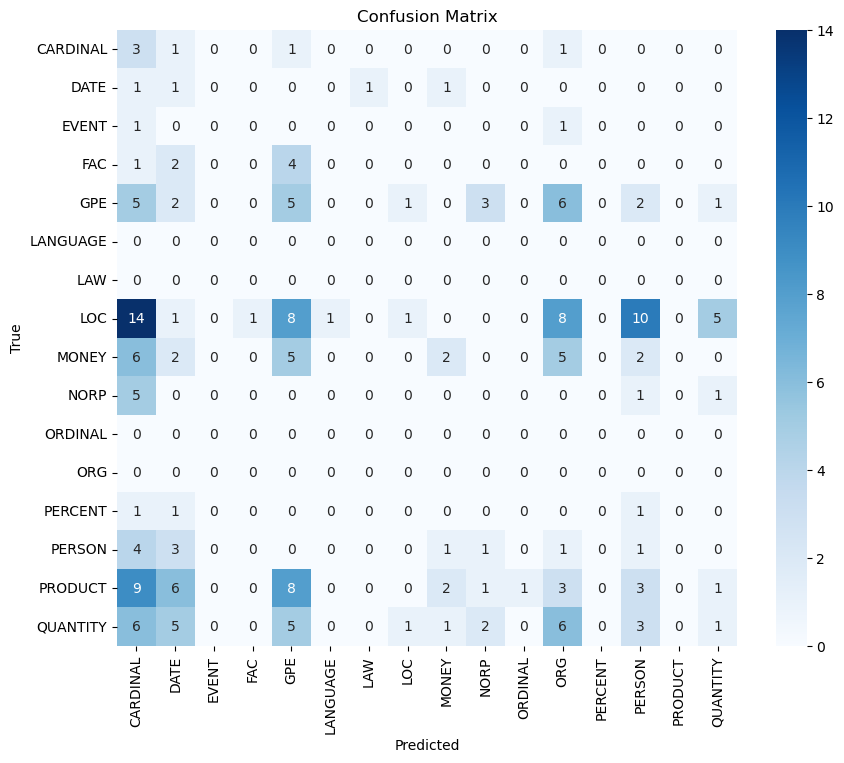

In [22]:
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



labels = sorted(list(set(y_true + y_pred)))


conf_matrix = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Document 2 Comparison: Clipping from Chambers's Journal 1839


In [41]:
# Loading and Cleaning Hand Annotations

hand_annotated_data_2 = []
with open("Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/Chambers_Journal_literature_Jan26_1839.txt.tsv", "r", encoding="utf-8") as iob_file_2:
    for line in iob_file_2:
        line = line.strip()
        if line:
            token, label = line.split("\t")
           
            hand_annotated_data_2.append((token, label))

hand_annotated_tagged_2 = [(token, label) for token, label in hand_annotated_data_2 if label != 'O']

for i in range(len(hand_annotated_tagged_2)):
    token, label = hand_annotated_tagged_2[i]
    if label.startswith('B-'):
        label = label[2:]  # Remove "B-"
    elif label.startswith('I-'):
        label = label[2:]  # Remove "I-"
    hand_annotated_tagged_2[i] = (token, label)
    hand_annotated_clean_2 = hand_annotated_tagged_2

print(f'Hand Annotations List number = {len(hand_annotated_clean_2)}')
hand_annotated_clean_2

Hand Annotations List number = 269


[('EDINBURGIT', 'GPE'),
 ('CHAMBERS', 'PERSON'),
 ('WILLIAM', 'PERSON'),
 ('ROBERT', 'PERSON'),
 ('CHAMBERS', 'PERSON'),
 ('CHAMBERS', 'PERSON'),
 ('BRADBURY', 'PERSON'),
 ('EVANS', 'PERSON'),
 ('WHITEFRIARS', 'GPE'),
 ('SATURDAY', 'DATE'),
 (',', 'DATE'),
 ('JANUARY', 'DATE'),
 ('26', 'DATE'),
 (',', 'DATE'),
 ('1839', 'DATE'),
 ('THREE', 'MONEY'),
 ('HALFPENSE', 'MONEY'),
 ('meat', 'PRODUCT'),
 ('Crusoe', 'WORK_OF_ART'),
 ('Gulliver', 'WORK_OF_ART'),
 ('Waverley', 'WORK_OF_ART'),
 ('Novels', 'WORK_OF_ART'),
 ('Fielding', 'PERSON'),
 ('Smollett', 'PERSON'),
 ('Parson', 'PERSON'),
 ('Adams', 'PERSON'),
 ('Lilliputians', 'ORG'),
 ('Lilliput', 'GPE'),
 ('1728', 'DATE'),
 ('Lulliputians', 'ORG'),
 ('Mr', 'PERSON'),
 ('Gulliver', 'PERSON'),
 ('1728', 'DATE'),
 ('Caleb', 'PERSON'),
 ('Balderstone', 'PERSON'),
 ('Dalgetty', 'PERSON'),
 ('Dominie', 'PERSON'),
 ('Sampson', 'PERSON'),
 ('the', 'WORK_OF_ART'),
 ('novel', 'WORK_OF_ART'),
 ('Loch', 'LOC'),
 ('Katrine', 'LOC'),
 ('Fitzjames', 'PERS

In [25]:
# Loading Document 2
with open('Useful_Knowledge_Texts/Clipped_Texts/Chambers_Journal_literature_Jan26_1839.txt', "r", encoding="utf-8") as text_file_2:
    text_2 = text_file_2.read()

In [26]:
# Spacy Tagging Text
doc_2 = nlp(text_2)

In [42]:
spacy_annotations_2 = [(ent.text, ent.label_) for ent in doc_2.ents]

print(f'Spacy Annotations List number = {len(spacy_annotations_2)}')
spacy_annotations_2

Spacy Annotations List number = 203


[('#', 'MONEY'),
 ('1', 'CARDINAL'),
 ('17', 'MONEY'),
 ('###############################################', 'MONEY'),
 ('JO\n', 'PERSON'),
 ('ROBERT CHAMBERS', 'PERSON'),
 ('EVANS', 'PERSON'),
 ('WHITEFRIARS', 'GPE'),
 ('LONDON', 'GPE'),
 ('365', 'CARDINAL'),
 ('SATURDAY', 'DATE'),
 ('JANUARY 26, 1839', 'DATE'),
 ('THREE', 'CARDINAL'),
 ('US', 'GPE'),
 ('first', 'ORDINAL'),
 ('Crusoe', 'ORG'),
 ('Gulliver', 'PERSON'),
 ('Fielding', 'ORG'),
 ('Smollett', 'PERSON'),
 ('Parson Adams', 'PERSON'),
 ('a few years ago', 'DATE'),
 ('Lilliputians', 'NORP'),
 ('Brobdignagians', 'NORP'),
 ('Lilliput', 'FAC'),
 ('Lulliputians', 'NORP'),
 ('twenty-five years', 'DATE'),
 ('Blunder', 'ORG'),
 ('only inches', 'QUANTITY'),
 ('one', 'CARDINAL'),
 ('two', 'CARDINAL'),
 ('12', 'CARDINAL'),
 ('1728', 'DATE'),
 ('Caleb Balderstone', 'PERSON'),
 ('Dugald', 'PERSON'),
 ('Andrews', 'PERSON'),
 ('Dominie Sampson', 'PERSON'),
 ('Scott', 'ORG'),
 ('Stirling\n', 'ORG'),
 ('Loch Katrine', 'PERSON'),
 ('Fitzjames', 

/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Doc 2 (Chambers 1839) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS

Micro PRECISION score for subsets = 0.17
Weighted PRECISION score for subsets = 0.17011307117004268

Micro RECALL score for subsets = 0.17
Weighted RECALL score for subsets = 0.17

Micro F1 score for subsets = 0.17
Weighted F1 score for subsets = 0.16601620361063085



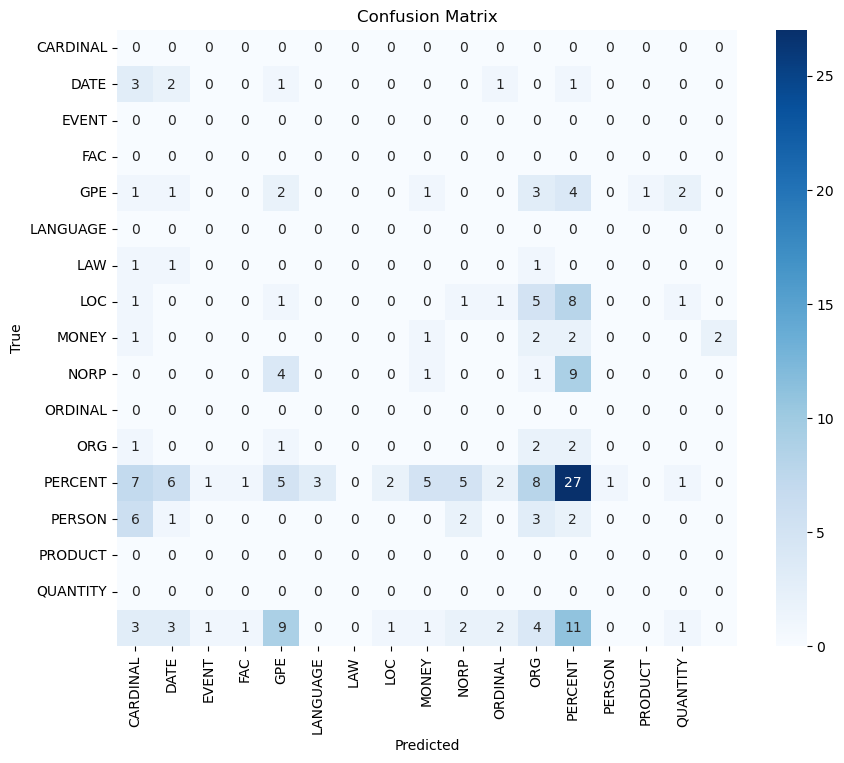

In [96]:
# Subsetting to Evaluate with Classification Reports and a Confusion matrix 

hand_subset_2 = hand_annotated_clean_2[:200]
spacy_subset_2 = spacy_annotations_2[:200]

y_true_2 = [label for token, label in hand_subset_2]
y_pred_2 = [label for token, label in spacy_subset_2]

prec_score_micro_2 = precision_score(y_true_2, y_pred_2, average='micro')
prec_score_weighted_2 = precision_score(y_true_2, y_pred_2, average='weighted')

rec_score_micro_2 = recall_score(y_true_2, y_pred_2, average='micro')
rec_score_weighted_2 = recall_score(y_true_2, y_pred_2, average='weighted')

f1_score_micro_2 = f1_score(y_true_2, y_pred_2, average='micro')
f1_score_weighted_2 = f1_score(y_true_2, y_pred_2, average='weighted')



print("Doc 2 (Chambers 1839) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS")
print()
print(f'Micro PRECISION score for subsets = {prec_score_micro_2}')
print(f'Weighted PRECISION score for subsets = {prec_score_weighted_2}')
print()
print(f'Micro RECALL score for subsets = {rec_score_micro_2}')
print(f'Weighted RECALL score for subsets = {rec_score_weighted_2}')
print()
print(f'Micro F1 score for subsets = {f1_score_micro_2}')
print(f'Weighted F1 score for subsets = {f1_score_weighted_2}')
print()


labels_2 = sorted(list(set(y_true_2 + y_pred_2)))

conf_matrix_2 = confusion_matrix(y_true_2, y_pred_2, labels=labels_2)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [59]:
# Evaluation Through Set Intersections and Differences 

ground_truth_set_2 = set(hand_annotated_clean_2)
spacy_predictions_set_2 = set(spacy_annotations_2)

true_positives_2 = ground_truth_set_2.intersection(spacy_predictions_set_2)

num_true_positives_2 = len(true_positives_2)
print('True Positives are when hand truth matches spacy predictions')
print(f"Number of True Positives: {num_true_positives_2}")
print()

for entity in true_positives_2:
    print(f"True Positive : {entity}")

True Positives are when hand truth matches spacy predictions
Number of True Positives: 37

True Positive : ('Leyden', 'PERSON')
True Positive : ('1728', 'DATE')
True Positive : ('Jenkinson', 'PERSON')
True Positive : ('Webster', 'PERSON')
True Positive : ('Scotland', 'GPE')
True Positive : ('Dryden', 'PERSON')
True Positive : ('Tabitha', 'PERSON')
True Positive : ('French', 'NORP')
True Positive : ('Pacific', 'LOC')
True Positive : ('Hannah', 'PERSON')
True Positive : ('Eugeniuses', 'PERSON')
True Positive : ('Smollett', 'PERSON')
True Positive : ('Italian', 'NORP')
True Positive : ('Cherry', 'PERSON')
True Positive : ('Plymouth', 'GPE')
True Positive : ('England', 'GPE')
True Positive : ('Hudibras', 'PERSON')
True Positive : ('Lovelace', 'PERSON')
True Positive : ('Herbert', 'PERSON')
True Positive : ('Hamilton', 'PERSON')
True Positive : ('Barbour', 'PERSON')
True Positive : ('Milton', 'PERSON')
True Positive : ('SATURDAY', 'DATE')
True Positive : ('Johnson', 'PERSON')
True Positive 

In [61]:
false_negatives_2 = ground_truth_set_2.difference(spacy_predictions_set_2)

num_false_negatives_2 = len(false_negatives_2)
print('False Negatvies are present in hand truth but not spacy predictions')
print(f"Number of False Negatives: {num_false_negatives_2}")
print()

for entity in false_negatives_2:
    print(f"False Negatives : {entity}")


False Negatvies are present in hand truth but not spacy predictions
Number of False Negatives: 179

False Negatives : ('Lord', 'PERSON')
False Negatives : ('French', 'FAC')
False Negatives : ('Lane', 'PERSON')
False Negatives : ('Baker', 'PERSON')
False Negatives : ('BRADBURY', 'PERSON')
False Negatives : ('THREE', 'MONEY')
False Negatives : ('Christian', 'WORK_OF_ART')
False Negatives : ('Crusoe', 'WORK_OF_ART')
False Negatives : ('professors', 'ORG')
False Negatives : ('OF', 'WORK_OF_ART')
False Negatives : ('fictions', 'WORK_OF_ART')
False Negatives : ('English', 'ORG')
False Negatives : ('poets', 'ORG')
False Negatives : ('Crusoe', 'PERSON')
False Negatives : ('Rembrandt', 'PERSON')
False Negatives : ('else', 'GPE')
False Negatives : ('Bower', 'LOC')
False Negatives : ('cottages', 'LOC')
False Negatives : ('Brown', 'PERSON')
False Negatives : ('New', 'GPE')
False Negatives : ('Mr', 'PERSON')
False Negatives : ('Bagdad', 'GPE')
False Negatives : ('hundred', 'MONEY')
False Negatives 

In [48]:
false_positives_2 = spacy_predictions_set_2.difference(ground_truth_set_2)


num_false_positives_2 = len(false_positives_2)
print('False Positives are predicted by spacy but are not in hand truth')
print(f"Number of False Positives: {num_false_positives_2}")
print()

for entity in false_positives_2:
    print(f"False Positive : {entity}")


False Positives are predicted by spacy but are not in hand truth
Number of False Positives: 183

False Positive : ('The summer months', 'DATE')
False Positive : ('Beau Tibbs', 'PERSON')
False Positive : ('THREE', 'CARDINAL')
False Positive : ('3', 'CARDINAL')
False Positive : ('Sweet', 'PERSON')
False Positive : ('hour', 'TIME')
False Positive : ('Orange Bower', 'LOC')
False Positive : ('Carwell\n', 'ORG')
False Positive : ('hundred', 'CARDINAL')
False Positive : ('2', 'CARDINAL')
False Positive : ('Miss Emily', 'PERSON')
False Positive : ('Haroun', 'GPE')
False Positive : ('Molly', 'GPE')
False Positive : ('the last century', 'DATE')
False Positive : ('Loch Katrine', 'PERSON')
False Positive : ("Cowper's Task", 'ORG')
False Positive : ('Scott', 'ORG')
False Positive : ('Rose', 'PERSON')
False Positive : ('Liddel', 'ORG')
False Positive : ('12', 'CARDINAL')
False Positive : ('five minutes', 'TIME')
False Positive : ('Locke and Mrs Chapone', 'WORK_OF_ART')
False Positive : ('#', 'MONEY'

In [49]:
rec_calc_2 = num_true_positives_2 / (num_true_positives_2 + num_false_negatives_2)
prec_calc_2 = num_true_positives_2 / (num_true_positives_2 + num_false_positives_2)
f1_calc_2 = (2 * prec_calc_2 * rec_calc_2) / (prec_calc_2 + rec_calc_2)

print('Evaluation Calculation Reports')
print()
print(f'Recall Score = {rec_calc_2}')
print(f'Precision Score = {prec_calc_2}')
print(f'F1 Score = {f1_calc_2}')


Evaluation Calculation Reports

Recall Score = 0.1712962962962963
Precision Score = 0.22839506172839505
F1 Score = 0.19576719576719578


Document 3 Comparison: Clipping from Chambers's Journal 1851 (on Monasteries)

In [52]:

# Loading and Cleaning Hand Annotations

hand_annotated_data_3 = []
with open("Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/Chambers_Journal_monastery_1851.txt.tsv", "r", encoding="utf-8") as iob_file_3:
    for line in iob_file_3:
        line = line.strip()
        if line:
            token, label = line.split("\t")
           
            hand_annotated_data_3.append((token, label))

hand_annotated_tagged_3 = [(token, label) for token, label in hand_annotated_data_3 if label != 'O']

for i in range(len(hand_annotated_tagged_3)):
    token, label = hand_annotated_tagged_3[i]
    if label.startswith('B-'):
        label = label[2:]  # Remove "B-"
    elif label.startswith('I-'):
        label = label[2:]  # Remove "I-"
    hand_annotated_tagged_3[i] = (token, label)
    hand_annotated_clean_3 = hand_annotated_tagged_3

print(f'Hand Annotations List number = {len(hand_annotated_clean_3)}')
hand_annotated_clean_3


Hand Annotations List number = 113


[('MONASTERY', 'FAC'),
 ('monks', 'NORP'),
 ('monkery', 'NORP'),
 ('Radcliffian', 'DATE'),
 ('era', 'DATE'),
 ('England', 'GPE'),
 ('Gate', 'LOC'),
 ('-', 'LOC'),
 ('house', 'LOC'),
 ('revolution', 'EVENT'),
 ('Guest', 'LOC'),
 ('-', 'LOC'),
 ('Hall', 'LOC'),
 ('Benedictine', 'LOC'),
 ('convent', 'LOC'),
 ('Ham', 'GPE'),
 ('Benedictines', 'NORP'),
 ('monastery', 'NORP'),
 ('of', 'NORP'),
 ('Mount', 'NORP'),
 ('St', 'NORP'),
 ('Bernard', 'NORP'),
 ('Leicestershire', 'GPE'),
 ('cattle', 'PRODUCT'),
 ('breeds', 'PRODUCT'),
 ('county', 'LOC'),
 ('place', 'LOC'),
 ('of', 'LOC'),
 ('abode', 'LOC'),
 ('English', 'FAC'),
 ('monas', 'FAC'),
 ('-', 'FAC'),
 ('tery', 'FAC'),
 ('rail', 'FAC'),
 ('abbey', 'FAC'),
 ('conventual', 'FAC'),
 ('horse', 'FAC'),
 ('monastery', 'FAC'),
 ('monastery', 'FAC'),
 ('of', 'FAC'),
 ('St', 'FAC'),
 ('Bernard', 'FAC'),
 ('vespers', 'TIME'),
 ('England', 'GPE'),
 ('county', 'LOC'),
 ('short', 'PRODUCT'),
 ('horns', 'PRODUCT'),
 ('brethren', 'NORP'),
 ('in', 'NORP'),

In [54]:
# Loading Document 3
with open('Useful_Knowledge_Texts/Clipped_Texts/Chambers_Journal_monastery_1851.txt', "r", encoding="utf-8") as text_file_3:
    text_3 = text_file_3.read()

In [56]:
# spacy annotations for Document 3

doc_3 = nlp(text_3)
spacy_annotations_3 = [(ent.text, ent.label_) for ent in doc_3.ents]

print(f'Spacy Annotations List number = {len(spacy_annotations_3)}')
spacy_annotations_3

Spacy Annotations List number = 47


[('Radcliffian', 'NORP'),
 ('England', 'GPE'),
 ('Italian', 'NORP'),
 ('Spanish', 'NORP'),
 ('Gate', 'ORG'),
 ('French', 'NORP'),
 ('the Guest-Hall', 'ORG'),
 ('English', 'LANGUAGE'),
 ('Benedictine', 'ORG'),
 ('Ham', 'ORG'),
 ('Benedictines', 'NORP'),
 ('Fathers', 'ORG'),
 ('half', 'CARDINAL'),
 ('English', 'LANGUAGE'),
 ('six miles', 'QUANTITY'),
 ('Fathers', 'ORG'),
 ('Irishman', 'NORP'),
 ('Irishman', 'NORP'),
 ('evening', 'TIME'),
 ('St Bernard', 'PERSON'),
 ('evening', 'TIME'),
 ('Crucifixion', 'ORG'),
 ('the Salve Regina', 'GPE'),
 ('forty', 'CARDINAL'),
 ('#', 'MONEY'),
 ('338', 'CARDINAL'),
 ('350', 'MONEY'),
 ('############################################', 'MONEY'),
 ('338', 'CARDINAL'),
 ('EDINBURGH JOURNAL', 'ORG'),
 ('the night', 'TIME'),
 ('England', 'GPE'),
 ('first', 'ORDINAL'),
 ('the Confessional of the Black\nPenitents', 'ORG'),
 ('Montorio', 'PERSON'),
 ('the hour', 'TIME'),
 ('Montorio', 'PERSON'),
 ('two or three hours', 'TIME'),
 ('half-past', 'DATE'),
 ('one', 

/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Doc 3 (Chambers 1851 - Monasteries) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS

Micro PRECISION score for subsets = 0.08888888888888889
Weighted PRECISION score for subsets = 0.10582010582010581

Micro RECALL score for subsets = 0.08888888888888889
Weighted RECALL score for subsets = 0.08888888888888889

Micro F1 score for subsets = 0.08888888888888889
Weighted F1 score for subsets = 0.0965079365079365



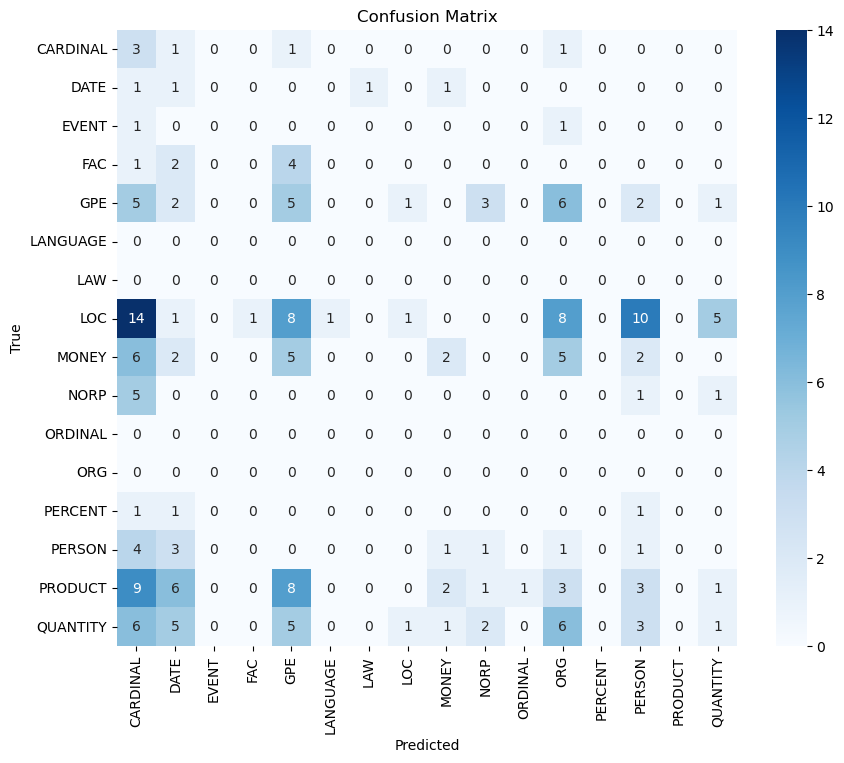

In [58]:
# Subsetting to Evaluate with Classification Reports and a Confusion matrix 

# Subsetting
hand_subset_3 = hand_annotated_clean_3[:45]
spacy_subset_3 = spacy_annotations_3[:45]

# Setting Ground Truth and Predictions
y_true_3 = [label for token, label in hand_subset_3]
y_pred_3 = [label for token, label in spacy_subset_3]

# Evaluation Reports
prec_score_micro_3 = precision_score(y_true_3, y_pred_3, average='micro')
prec_score_weighted_3 = precision_score(y_true_3, y_pred_3, average='weighted')

rec_score_micro_3 = recall_score(y_true_3, y_pred_3, average='micro')
rec_score_weighted_3 = recall_score(y_true_3, y_pred_3, average='weighted')

f1_score_micro_3 = f1_score(y_true_3, y_pred_3, average='micro')
f1_score_weighted_3 = f1_score(y_true_3, y_pred_3, average='weighted')


print("Doc 3 (Chambers 1851 - Monasteries) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS")
print()
print(f'Micro PRECISION score for subsets = {prec_score_micro_3}')
print(f'Weighted PRECISION score for subsets = {prec_score_weighted_3}')
print()
print(f'Micro RECALL score for subsets = {rec_score_micro_3}')
print(f'Weighted RECALL score for subsets = {rec_score_weighted_3}')
print()
print(f'Micro F1 score for subsets = {f1_score_micro_3}')
print(f'Weighted F1 score for subsets = {f1_score_weighted_3}')
print()

# Confusion Matrix
labels_3 = sorted(list(set(y_true_3 + y_pred_3)))
conf_matrix_3 = confusion_matrix(y_true_3, y_pred_3, labels=labels_3)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_3, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [62]:
# Evaluation Through Set Intersections and Differences 

ground_truth_set_3 = set(hand_annotated_clean_3)
spacy_predictions_set_3 = set(spacy_annotations_3)

true_positives_3 = ground_truth_set_3.intersection(spacy_predictions_set_3)

num_true_positives_3 = len(true_positives_3)
print('True Positives are when hand truth matches spacy predictions')
print(f"Number of True Positives: {num_true_positives_3}")
print()

for entity in true_positives_3:
    print(f"True Positive : {entity}")

True Positives are when hand truth matches spacy predictions
Number of True Positives: 3

True Positive : ('Montorio', 'PERSON')
True Positive : ('Benedictines', 'NORP')
True Positive : ('England', 'GPE')


In [63]:
false_negatives_3 = ground_truth_set_3.difference(spacy_predictions_set_3)

num_false_negatives_3 = len(false_negatives_3)
print('False Negatives are present in hand truth but not spacy predictions')
print(f"Number of False Negatives: {num_false_negatives_3}")
print()

for entity in false_negatives_3:
    print(f"False Negatives : {entity}")

False Negatvies are present in hand truth but not spacy predictions
Number of False Negatives: 78

False Negatives : ('monas', 'FAC')
False Negatives : ('hymn', 'WORK_OF_ART')
False Negatives : ('of', 'FAC')
False Negatives : ('Salve', 'WORK_OF_ART')
False Negatives : ('Radcliffian', 'DATE')
False Negatives : ('MONASTERY', 'FAC')
False Negatives : ('Ham', 'GPE')
False Negatives : ('-', 'FAC')
False Negatives : ('altar', 'WORK_OF_ART')
False Negatives : ('past', 'TIME')
False Negatives : ('of', 'LOC')
False Negatives : ('place', 'LOC')
False Negatives : ('CHAMBERS', 'PERSON')
False Negatives : ('the', 'WORK_OF_ART')
False Negatives : ('priests', 'NORP')
False Negatives : ('-', 'LOC')
False Negatives : ('convent', 'LOC')
False Negatives : ('or', 'TIME')
False Negatives : ('church', 'FAC')
False Negatives : ('saints', 'NORP')
False Negatives : ('English', 'FAC')
False Negatives : ('cattle', 'PRODUCT')
False Negatives : ('in', 'NORP')
False Negatives : ('cloisters', 'FAC')
False Negatives 

In [64]:
false_positives_3 = spacy_predictions_set_3.difference(ground_truth_set_3)

num_false_positives_3 = len(false_positives_3)
print('False Positives are predicted by spacy but are not in hand truth')
print(f"Number of False Positives: {num_false_positives_3}")
print()

for entity in false_positives_3:
    print(f"False Positive : {entity}")


False Positives are predicted by spacy but are not in hand truth
Number of False Positives: 36

False Positive : ('Fathers', 'ORG')
False Positive : ('festival-day', 'DATE')
False Positive : ('EDINBURGH JOURNAL', 'ORG')
False Positive : ('two or three hours', 'TIME')
False Positive : ('338', 'CARDINAL')
False Positive : ('350', 'MONEY')
False Positive : ('############################################', 'MONEY')
False Positive : ('Ham', 'ORG')
False Positive : ('eight', 'CARDINAL')
False Positive : ('Gate', 'ORG')
False Positive : ('the Guest-Hall', 'ORG')
False Positive : ('French', 'NORP')
False Positive : ('Spanish', 'NORP')
False Positive : ('the hour', 'TIME')
False Positive : ('Benedictine', 'ORG')
False Positive : ('Crucifixion', 'ORG')
False Positive : ('six', 'CARDINAL')
False Positive : ('evening', 'TIME')
False Positive : ('Italian', 'NORP')
False Positive : ('forty', 'CARDINAL')
False Positive : ('the Salve Regina', 'GPE')
False Positive : ('six miles', 'QUANTITY')
False Posi

In [65]:
rec_calc_3 = num_true_positives_3 / (num_true_positives_3 + num_false_negatives_3)
prec_calc_3 = num_true_positives_3 / (num_true_positives_3 + num_false_positives_3)
f1_calc_3 = (2 * prec_calc_3 * rec_calc_3) / (prec_calc_3 + rec_calc_3)

print(f'Evaluation Calculation Reports for Document 3 Chambers Journal 1851')
print()
print(f'Recall Score = {rec_calc_3}')
print(f'Precision Score = {prec_calc_3}')
print(f'F1 Score = {f1_calc_3}')


Evaluation Calculation Reports for Document 3 Chambers Journal 1851

Recall Score = 0.037037037037037035
Precision Score = 0.07692307692307693
F1 Score = 0.05


Document 4 Comparison: Clipping from Chambers's Journal 1872 (on Sorrow)

In [68]:
hand_annotated_data_4 = []
with open("Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/Chambers_Journal_sorrow_Jan6_1872.txt.tsv", "r", encoding="utf-8") as iob_file_4:
    for line in iob_file_4:
        line = line.strip()
        if line:
            token, label = line.split("\t")
           
            hand_annotated_data_4.append((token, label))

hand_annotated_tagged_4 = [(token, label) for token, label in hand_annotated_data_4 if label != 'O']

hand_annotated_tagged_4

[('CHAMBERS', 'B-PERSON'),
 ('WILLIAM', 'B-PERSON'),
 ('ROBERT', 'B-PERSON'),
 ('419', 'B-CARDINAL'),
 ('SATURDAY', 'B-DATE'),
 (',', 'I-DATE'),
 ('JANUARY', 'I-DATE'),
 ('6', 'I-DATE'),
 (',', 'I-DATE'),
 ('1872', 'I-DATE'),
 ('CHAMBERS', 'B-PERSON'),
 ('MIRIAM', 'B-PERSON'),
 ('CLINT', 'I-PERSON'),
 ('Miriam', 'B-PERSON'),
 ('Clint', 'I-PERSON'),
 ('Miriam', 'B-PERSON'),
 ('school', 'B-FAC'),
 ('eight', 'B-QUANTITY'),
 ('years', 'I-QUANTITY'),
 ('A', 'B-WORK_OF_ART'),
 ('HOUSE', 'I-WORK_OF_ART'),
 ('OF', 'I-WORK_OF_ART'),
 ('CARDS', 'I-WORK_OF_ART'),
 ('Miriam', 'B-PERSON'),
 ('Miss', 'B-FAC'),
 ('Monitor', 'I-FAC'),
 ("'s", 'I-FAC'),
 ('school', 'I-FAC'),
 ('Cres', 'B-LOC'),
 ('-', 'I-LOC'),
 ('cent', 'I-LOC'),
 ('House', 'I-LOC'),
 ('Hampstead', 'B-GPE'),
 ('Mr', 'B-PERSON'),
 ('Clint', 'I-PERSON'),
 ('Miriam', 'B-PERSON'),
 ('Miriam', 'B-PERSON'),
 ('Mr', 'B-PERSON'),
 ('Clint', 'I-PERSON'),
 ('11', 'B-MONEY'),
 ('d', 'I-MONEY'),
 ('Shakspeare', 'B-PERSON'),
 ('Mr', 'B-PERSON'),
 

In [69]:
def merge_iob_tokens(annotations):
    merged_annotations = []
    current_entity = None
    current_tokens = []

    for token, label in annotations:
        iob_prefix, entity = label.split('-')
        
        if iob_prefix == 'B':
            # Start a new entity
            if current_entity:
                merged_annotations.append((' '.join(current_tokens), current_entity))
            current_entity = entity
            current_tokens = [token]
        elif iob_prefix == 'I':
            # Continue the current entity
            if current_entity == entity:
                current_tokens.append(token)
            else:
                # Start a new entity if the entity type changes
                if current_entity:
                    merged_annotations.append((' '.join(current_tokens), current_entity))
                current_entity = entity
                current_tokens = [token]

    # Append the last entity if any
    if current_entity:
        merged_annotations.append((' '.join(current_tokens), current_entity))

    return merged_annotations

In [74]:
merged_hand_annotations_4 = merge_iob_tokens(hand_annotated_tagged_4)

print(f'Hand Annotations List number = {len(merged_hand_annotations_4)}')
merged_hand_annotations_4 

Hand Annotations List number = 82


[('CHAMBERS', 'PERSON'),
 ('WILLIAM', 'PERSON'),
 ('ROBERT', 'PERSON'),
 ('419', 'CARDINAL'),
 ('SATURDAY , JANUARY 6 , 1872', 'DATE'),
 ('CHAMBERS', 'PERSON'),
 ('MIRIAM CLINT', 'PERSON'),
 ('Miriam Clint', 'PERSON'),
 ('Miriam', 'PERSON'),
 ('school', 'FAC'),
 ('eight years', 'QUANTITY'),
 ('A HOUSE OF CARDS', 'WORK_OF_ART'),
 ('Miriam', 'PERSON'),
 ("Miss Monitor 's school", 'FAC'),
 ('Cres - cent House', 'LOC'),
 ('Hampstead', 'GPE'),
 ('Mr Clint', 'PERSON'),
 ('Miriam', 'PERSON'),
 ('Miriam', 'PERSON'),
 ('Mr Clint', 'PERSON'),
 ('11 d', 'MONEY'),
 ('Shakspeare', 'PERSON'),
 ('Mr Clint', 'PERSON'),
 ('Miriam', 'PERSON'),
 ('Crescent House', 'LOC'),
 ('Miss Monitor', 'PERSON'),
 ('Miss Monitor', 'PERSON'),
 ('Miriam', 'PERSON'),
 ('Miss Monitor', 'PERSON'),
 ('Miriam', 'PERSON'),
 ('Miriam', 'PERSON'),
 ('3 d June 18', 'DATE'),
 ('Dr Miriam', 'PERSON'),
 ('CHAMBERS', 'PERSON'),
 ('6th', 'DATE'),
 ('Crest House', 'LOC'),
 ('the hours of 12 and 4', 'TIME'),
 ('Miss M', 'PERSON'),
 ('

In [72]:
# Loading Document 4
with open('Useful_Knowledge_Texts/Clipped_Texts/Chambers_Journal_monastery_1851.txt', "r", encoding="utf-8") as text_file_4:
    text_4 = text_file_4.read()

In [73]:
# spacy annotations for Document 4
doc_4 = nlp(text_4)
spacy_annotations_4 = [(ent.text, ent.label_) for ent in doc_4.ents]

print(f'Spacy Annotations List number = {len(spacy_annotations_4)}')
spacy_annotations_4

Spacy Annotations List number = 47


[('Radcliffian', 'NORP'),
 ('England', 'GPE'),
 ('Italian', 'NORP'),
 ('Spanish', 'NORP'),
 ('Gate', 'ORG'),
 ('French', 'NORP'),
 ('the Guest-Hall', 'ORG'),
 ('English', 'LANGUAGE'),
 ('Benedictine', 'ORG'),
 ('Ham', 'ORG'),
 ('Benedictines', 'NORP'),
 ('Fathers', 'ORG'),
 ('half', 'CARDINAL'),
 ('English', 'LANGUAGE'),
 ('six miles', 'QUANTITY'),
 ('Fathers', 'ORG'),
 ('Irishman', 'NORP'),
 ('Irishman', 'NORP'),
 ('evening', 'TIME'),
 ('St Bernard', 'PERSON'),
 ('evening', 'TIME'),
 ('Crucifixion', 'ORG'),
 ('the Salve Regina', 'GPE'),
 ('forty', 'CARDINAL'),
 ('#', 'MONEY'),
 ('338', 'CARDINAL'),
 ('350', 'MONEY'),
 ('############################################', 'MONEY'),
 ('338', 'CARDINAL'),
 ('EDINBURGH JOURNAL', 'ORG'),
 ('the night', 'TIME'),
 ('England', 'GPE'),
 ('first', 'ORDINAL'),
 ('the Confessional of the Black\nPenitents', 'ORG'),
 ('Montorio', 'PERSON'),
 ('the hour', 'TIME'),
 ('Montorio', 'PERSON'),
 ('two or three hours', 'TIME'),
 ('half-past', 'DATE'),
 ('one', 

/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Doc 4 (Chambers 1872 - Sorrow) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS

Micro PRECISION score for subsets = 0.025
Weighted PRECISION score for subsets = 0.2

Micro RECALL score for subsets = 0.025
Weighted RECALL score for subsets = 0.025

Micro F1 score for subsets = 0.025000000000000005
Weighted F1 score for subsets = 0.04444444444444444



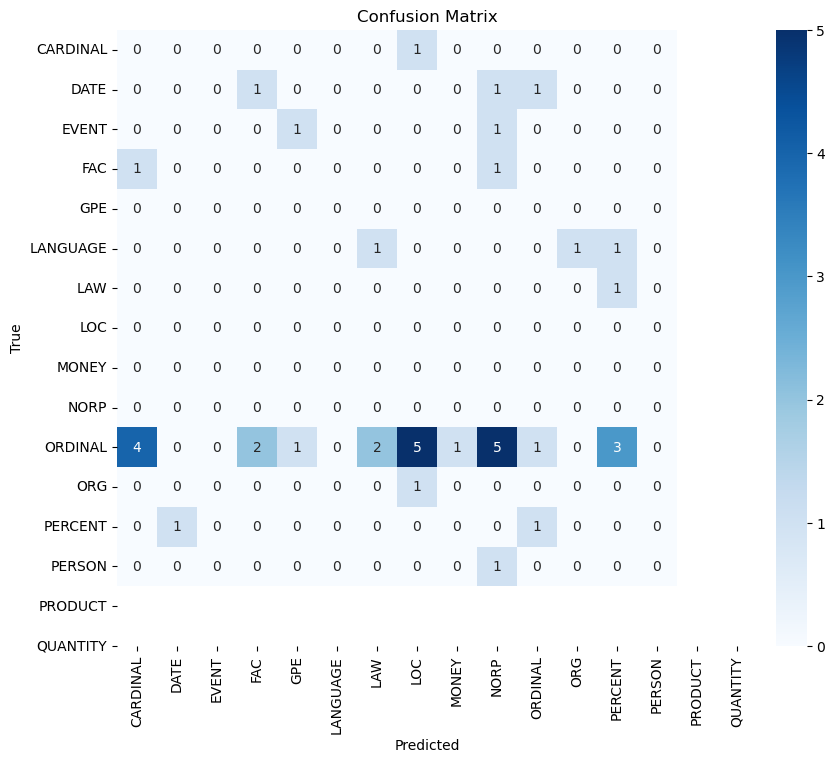

In [95]:
# Subsetting to Evaluate with Classification Reports and a Confusion matrix 

# Subsetting
hand_subset_4 = merged_hand_annotations_4[:40]
spacy_subset_4 = spacy_annotations_4[:40]

# Setting Ground Truth and Predictions
y_true_4 = [label for token, label in hand_subset_4]
y_pred_4 = [label for token, label in spacy_subset_4]

# Evaluation Reports
prec_score_micro_4 = precision_score(y_true_4, y_pred_4, average='micro')
prec_score_weighted_4 = precision_score(y_true_4, y_pred_4, average='weighted')

rec_score_micro_4 = recall_score(y_true_4, y_pred_4, average='micro')
rec_score_weighted_4 = recall_score(y_true_4, y_pred_4, average='weighted')

f1_score_micro_4 = f1_score(y_true_4, y_pred_4, average='micro')
f1_score_weighted_4 = f1_score(y_true_4, y_pred_4, average='weighted')


print("Doc 4 (Chambers 1872 - Sorrow) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS")
print()
print(f'Micro PRECISION score for subsets = {prec_score_micro_4}')
print(f'Weighted PRECISION score for subsets = {prec_score_weighted_4}')
print()
print(f'Micro RECALL score for subsets = {rec_score_micro_4}')
print(f'Weighted RECALL score for subsets = {rec_score_weighted_4}')
print()
print(f'Micro F1 score for subsets = {f1_score_micro_4}')
print(f'Weighted F1 score for subsets = {f1_score_weighted_4}')
print()

# Confusion Matrix
labels_4 = sorted(list(set(y_true_4 + y_pred_4)))
conf_matrix_4 = confusion_matrix(y_true_4, y_pred_4, labels=labels_4)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_4, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [81]:
# Evaluation Through Set Intersections and Differences 

ground_truth_set_4 = set(merged_hand_annotations_4)
spacy_predictions_set_4 = set(spacy_annotations_4)

true_positives_4 = ground_truth_set_4.intersection(spacy_predictions_set_4)

num_true_positives_4 = len(true_positives_4)
print('True Positives are when hand truth matches spacy predictions')
print(f"Number of True Positives: {num_true_positives_4}")
print()

for entity in true_positives_4:
    print(f"True Positive : {entity}")

True Positives are when hand truth matches spacy predictions
Number of True Positives: 0



In [82]:
false_negatives_4 = ground_truth_set_4.difference(spacy_predictions_set_4)

num_false_negatives_4 = len(false_negatives_4)
print('False Negatives are present in hand truth but not spacy predictions')
print(f"Number of False Negatives: {num_false_negatives_4}")
print()

for entity in false_negatives_4:
    print(f"False Negatives : {entity}")

False Negatives are present in hand truth but not spacy predictions
Number of False Negatives: 38

False Negatives : ('11 A.M.', 'TIME')
False Negatives : ('Miriam', 'GPE')
False Negatives : ('Miriam Clint', 'PERSON')
False Negatives : ('6th', 'DATE')
False Negatives : ('Mr Walker', 'PERSON')
False Negatives : ('Miss Monitor', 'PERSON')
False Negatives : ('Cres - cent House', 'LOC')
False Negatives : ('Crescent House', 'LOC')
False Negatives : ('Miss M', 'PERSON')
False Negatives : ('opera', 'FAC')
False Negatives : ('Crest House', 'LOC')
False Negatives : ('the hours of 12 and 4', 'TIME')
False Negatives : ('eight years', 'QUANTITY')
False Negatives : ('419', 'CARDINAL')
False Negatives : ('WILLIAM', 'PERSON')
False Negatives : ('CHAMBERS', 'PERSON')
False Negatives : ('Jane', 'PERSON')
False Negatives : ('MIRIAM CLINT', 'PERSON')
False Negatives : ("lady 's boarding - school", 'FAC')
False Negatives : ('Mr Clint', 'PERSON')
False Negatives : ('Miriam', 'PERSON')
False Negatives : ('D

In [83]:
false_positives_4 = spacy_predictions_set_4.difference(ground_truth_set_4)

num_false_positives_4 = len(false_positives_4)
print('False Positives are predicted by spacy but are not in hand truth')
print(f"Number of False Positives: {num_false_positives_4}")
print()

for entity in false_positives_4:
    print(f"False Positive : {entity}")

False Positives are predicted by spacy but are not in hand truth
Number of False Positives: 39

False Positive : ('Fathers', 'ORG')
False Positive : ('festival-day', 'DATE')
False Positive : ('Montorio', 'PERSON')
False Positive : ('EDINBURGH JOURNAL', 'ORG')
False Positive : ('two or three hours', 'TIME')
False Positive : ('338', 'CARDINAL')
False Positive : ('350', 'MONEY')
False Positive : ('############################################', 'MONEY')
False Positive : ('Ham', 'ORG')
False Positive : ('eight', 'CARDINAL')
False Positive : ('Gate', 'ORG')
False Positive : ('the Guest-Hall', 'ORG')
False Positive : ('French', 'NORP')
False Positive : ('Spanish', 'NORP')
False Positive : ('the hour', 'TIME')
False Positive : ('Benedictine', 'ORG')
False Positive : ('Crucifixion', 'ORG')
False Positive : ('six', 'CARDINAL')
False Positive : ('evening', 'TIME')
False Positive : ('Italian', 'NORP')
False Positive : ('forty', 'CARDINAL')
False Positive : ('Benedictines', 'NORP')
False Positive :

In [86]:
rec_calc_4 = num_true_positives_4 / (num_true_positives_4 + num_false_negatives_4)
prec_calc_4 = num_true_positives_4 / (num_true_positives_4 + num_false_positives_4)
# f1_calc_4 = (2 * prec_calc_4 * rec_calc_4) / (prec_calc_4 + rec_calc_4)

print(f'Evaluation Calculation Reports for Document 4 Chambers Journal 1872')
print()
print(f'Recall Score = {rec_calc_4}')
print(f'Precision Score = {prec_calc_4}')
print(f'F1 Score = Divide by 0 Problem')

Evaluation Calculation Reports for Document 3 Chambers Journal 1872

Recall Score = 0.0
Precision Score = 0.0
F1 Score = Divide by 0 Problem


Document 5 Comparison: Clipping from SDCGK Annual Report 1888 on their Constitution

In [90]:
hand_annotated_data_5 = []
with open("Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/SDCGK_AnnualReport_constitution_1888.txt.tsv", "r", encoding="utf-8") as iob_file_5:
    for line in iob_file_5:
        line = line.strip()
        if line:
            token, label = line.split("\t")
           
            hand_annotated_data_5.append((token, label))

hand_annotated_tagged_5 = [(token, label) for token, label in hand_annotated_data_5 if label != 'O']

merged_hand_annotations_5 = merge_iob_tokens(hand_annotated_tagged_5)

print(f'Hand Annotations List number = {len(merged_hand_annotations_5)}')
merged_hand_annotations_5 

Hand Annotations List number = 104


[('Society for tbe Diffusion of Christian anO General IRnowlehae among the Chinese',
  'ORG'),
 ('Society', 'ORG'),
 ('Society for the Diffusion of Christian and General Knowledge among the Chinese',
  'ORG'),
 ('Chinese', 'LANGUAGE'),
 ('the Society', 'ORG'),
 ('Printing Press', 'FAC'),
 ('the Book and Tract Society of China', 'ORG'),
 ('China', 'GPE'),
 ('Colonies', 'LOC'),
 ('Dependencies', 'LOC'),
 ('Chinamen', 'NORP'),
 ('Society', 'ORG'),
 ('books', 'PRODUCT'),
 ('articles', 'PRODUCT'),
 ('tracts', 'PRODUCT'),
 ('intelligent classes in China', 'ORG'),
 ('Society', 'ORG'),
 ('Chinese Book and Tract Society', 'ORG'),
 ('Glasgow', 'GPE'),
 ('December 1884', 'DATE'),
 ('Society for the Diffusion of Christian and General Knowledge among the Chinese',
  'ORG'),
 ('1887', 'DATE'),
 ('Christian Literature Society', 'GPE'),
 ('1905', 'DATE'),
 ('1894', 'DATE'),
 ('Chinese', 'LANGUAGE'),
 ('works', 'PRODUCT'),
 ('Board', 'ORG'),
 ('Shanghai', 'GPE'),
 ('Capital', 'GPE'),
 ('cities', 'LOC')

In [92]:
# Loading Document 5
with open('Useful_Knowledge_Texts/Clipped_Texts/SDCGK_AnnualReport_constitution_1888.txt', "r", encoding="utf-8") as text_file_5:
    text_5 = text_file_5.read()

In [93]:
doc_5 = nlp(text_5)
spacy_annotations_5 = [(ent.text, ent.label_) for ent in doc_5.ents]

print(f'Spacy Annotations List number = {len(spacy_annotations_5)}')
spacy_annotations_5

Spacy Annotations List number = 118


[('17', 'MONEY'),
 ('#################################################', 'MONEY'),
 ('IRnowlehae', 'PERSON'),
 ('Chinese', 'NORP'),
 ('§', 'NORP'),
 ('English', 'LANGUAGE'),
 ('Chinese', 'NORP'),
 ('Chinese', 'NORP'),
 ('rJ %', 'PERCENT'),
 ('Article II', 'LAW'),
 ('Society', 'ORG'),
 ('the Printing Press', 'ORG'),
 ('the Book and Tract \n Society of China', 'WORK_OF_ART'),
 ('2', 'CARDINAL'),
 ('Christian', 'NORP'),
 ('China', 'GPE'),
 ('Society', 'ORG'),
 ('Article III', 'LAW'),
 ('Mode', 'PERSON'),
 ('first', 'ORDINAL'),
 ('Christian', 'NORP'),
 ('Chinese', 'NORP'),
 ('Second', 'ORDINAL'),
 ('China', 'GPE'),
 ('Third', 'ORDINAL'),
 ('first', 'ORDINAL'),
 ('Chinese Book and Tract \n Society', 'WORK_OF_ART'),
 ('Glasgow', 'GPE'),
 ('December 1884', 'DATE'),
 ('Chinese', 'NORP'),
 ('1887', 'DATE'),
 ('Christian', 'NORP'),
 ('1905', 'DATE'),
 ('1894', 'DATE'),
 ('Chinese', 'NORP'),
 ('1910', 'DATE'),
 ('#', 'MONEY'),
 ('18', 'MONEY'),
 ('#################################################

/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Doc 5 (SDCGKAC 1888 - Constitution) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS

Micro PRECISION score for subsets = 0.14
Weighted PRECISION score for subsets = 0.25975000000000004

Micro RECALL score for subsets = 0.14
Weighted RECALL score for subsets = 0.13999999999999999

Micro F1 score for subsets = 0.14
Weighted F1 score for subsets = 0.18187290969899664



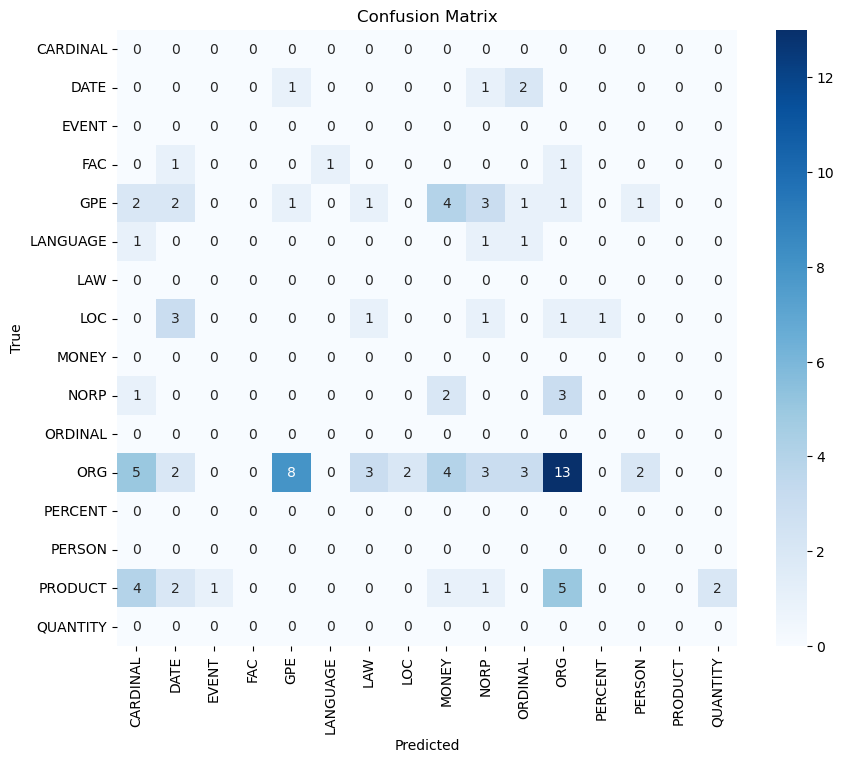

In [97]:
# Subsetting to Evaluate with Classification Reports and a Confusion matrix 

# Subsetting
hand_subset_5 = merged_hand_annotations_5[:100]
spacy_subset_5 = spacy_annotations_5[:100]

# Setting Ground Truth and Predictions
y_true_5 = [label for token, label in hand_subset_5]
y_pred_5 = [label for token, label in spacy_subset_5]

# Evaluation Reports
prec_score_micro_5 = precision_score(y_true_5, y_pred_5, average='micro')
prec_score_weighted_5 = precision_score(y_true_5, y_pred_5, average='weighted')

rec_score_micro_5 = recall_score(y_true_5, y_pred_5, average='micro')
rec_score_weighted_5 = recall_score(y_true_5, y_pred_5, average='weighted')

f1_score_micro_5 = f1_score(y_true_5, y_pred_5, average='micro')
f1_score_weighted_5 = f1_score(y_true_5, y_pred_5, average='weighted')


print("Doc 5 (SDCGKAC 1888 - Constitution) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS")
print()
print(f'Micro PRECISION score for subsets = {prec_score_micro_5}')
print(f'Weighted PRECISION score for subsets = {prec_score_weighted_5}')
print()
print(f'Micro RECALL score for subsets = {rec_score_micro_5}')
print(f'Weighted RECALL score for subsets = {rec_score_weighted_5}')
print()
print(f'Micro F1 score for subsets = {f1_score_micro_5}')
print(f'Weighted F1 score for subsets = {f1_score_weighted_5}')
print()

# Confusion Matrix
labels_5 = sorted(list(set(y_true_5 + y_pred_5)))
conf_matrix_5 = confusion_matrix(y_true_5, y_pred_5, labels=labels_5)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_5, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [98]:
# Evaluation Through Set Intersections and Differences 

ground_truth_set_5 = set(merged_hand_annotations_5)
spacy_predictions_set_5 = set(spacy_annotations_5)

true_positives_5 = ground_truth_set_5.intersection(spacy_predictions_set_5)

num_true_positives_5 = len(true_positives_5)
print('True Positives are when hand truth matches spacy predictions')
print(f"Number of True Positives: {num_true_positives_5}")
print()

for entity in true_positives_5:
    print(f"True Positive : {entity}")

True Positives are when hand truth matches spacy predictions
Number of True Positives: 16

True Positive : ('Hongkong', 'GPE')
True Positive : ('Chinese', 'NORP')
True Positive : ('Yokohama', 'GPE')
True Positive : ('December 1884', 'DATE')
True Positive : ('Glasgow', 'GPE')
True Positive : ('1905', 'DATE')
True Positive : ('Board', 'ORG')
True Positive : ('Shanghai', 'GPE')
True Positive : ('1894', 'DATE')
True Positive : ('1887', 'DATE')
True Positive : ('Society', 'ORG')
True Positive : ('Penang', 'GPE')
True Positive : ('Directors', 'ORG')
True Positive : ('Singapore', 'GPE')
True Positive : ('China', 'GPE')
True Positive : ('Peking', 'GPE')


In [99]:
false_negatives_5 = ground_truth_set_5.difference(spacy_predictions_set_5)

num_false_negatives_5 = len(false_negatives_5)
print('False Negatives are present in hand truth but not spacy predictions')
print(f"Number of False Negatives: {num_false_negatives_5}")
print()

for entity in false_negatives_5:
    print(f"False Negatives : {entity}")

False Negatives are present in hand truth but not spacy predictions
Number of False Negatives: 50

False Negatives : ('Printing Press', 'FAC')
False Negatives : ('Scriptures', 'PRODUCT')
False Negatives : ('Society for tbe Diffusion of Christian anO General IRnowlehae among the Chinese', 'ORG')
False Negatives : ('cities', 'LOC')
False Negatives : ('Dependencies', 'LOC')
False Negatives : ('Society for the Diffusion of Christian and General Knowledge among the Chinese', 'ORG')
False Negatives : ('Powers of the Board', 'ORG')
False Negatives : ('mem ¬ bers', 'ORG')
False Negatives : ('literati', 'ORG')
False Negatives : ('Sub - Committees', 'ORG')
False Negatives : ('empire', 'LOC')
False Negatives : ('members', 'ORG')
False Negatives : ('18 Provinces', 'LOC')
False Negatives : ('the Book and Tract Society of China', 'ORG')
False Negatives : ('the Society', 'ORG')
False Negatives : ('Local Associations', 'ORG')
False Negatives : ('Board of Directors', 'ORG')
False Negatives : ('emporium

In [100]:
false_positives_5 = spacy_predictions_set_5.difference(ground_truth_set_5)

num_false_positives_5 = len(false_positives_5)
print('False Positives are predicted by spacy but are not in hand truth')
print(f"Number of False Positives: {num_false_positives_5}")
print()

for entity in false_positives_5:
    print(f"False Positive : {entity}")

False Positives are predicted by spacy but are not in hand truth
Number of False Positives: 59

False Positive : ('4', 'CARDINAL')
False Positive : ('IRnowlehae', 'PERSON')
False Positive : ('#################################################', 'MONEY')
False Positive : ('three months’', 'DATE')
False Positive : ('Article II', 'LAW')
False Positive : ('Board of \n Directors', 'ORG')
False Positive : ('the Press and Plant', 'ORG')
False Positive : ('Batavia', 'PERSON')
False Positive : ('7', 'CARDINAL')
False Positive : ('recent years', 'DATE')
False Positive : ('19', 'MONEY')
False Positive : ('2', 'CARDINAL')
False Positive : ('each year', 'DATE')
False Positive : ('Mode', 'PERSON')
False Positive : ('21', 'MONEY')
False Positive : ('December', 'DATE')
False Positive : ('1910', 'DATE')
False Positive : ('Christian', 'NORP')
False Positive : ('monthly', 'DATE')
False Positive : ('§', 'NORP')
False Positive : ('Capital', 'LOC')
False Positive : ('Second', 'ORDINAL')
False Positive : ('th

In [101]:
rec_calc_5 = num_true_positives_5 / (num_true_positives_5 + num_false_negatives_5)
prec_calc_5 = num_true_positives_5 / (num_true_positives_5 + num_false_positives_5)
f1_calc_5 = (2 * prec_calc_5 * rec_calc_5) / (prec_calc_5 + rec_calc_5)

print(f'Evaluation Calculation Reports for Document 5 SDCGKAC Annual Report 1888')
print()
print(f'Recall Score = {rec_calc_5}')
print(f'Precision Score = {prec_calc_5}')
print(f'F1 Score = {f1_calc_5}')

Evaluation Calculation Reports for Document 5 SDCGKAC Annual Report 1888

Recall Score = 0.24242424242424243
Precision Score = 0.21333333333333335
F1 Score = 0.22695035460992907


Document 6 Comparison: Clipping from SDCGK Annual Report 1893 on their Committee Publications

In [103]:
hand_annotated_data_6 = []
with open("Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/SDCGKC_AnnualReport_committee_publications_1893.txt.tsv", "r", encoding="utf-8") as iob_file_6:
    for line in iob_file_6:
        line = line.strip()
        if line:
            token, label = line.split("\t")
           
            hand_annotated_data_6.append((token, label))

hand_annotated_tagged_6 = [(token, label) for token, label in hand_annotated_data_6 if label != 'O']

merged_hand_annotations_6 = merge_iob_tokens(hand_annotated_tagged_6)

print(f'Hand Annotations List number = {len(merged_hand_annotations_6)}')
merged_hand_annotations_6

Hand Annotations List number = 183


[('Society', 'ORG'),
 ('Publications', 'PRODUCT'),
 ('Empress Dowager', 'PERSON'),
 ('September', 'DATE'),
 ('6,000', 'CARDINAL'),
 ('publications', 'PRODUCT'),
 ('ten', 'CARDINAL'),
 ('provinces', 'LOC'),
 ('60,000', 'CARDINAL'),
 ('720,000', 'CARDINAL'),
 ('pages', 'PRODUCT'),
 ('gratis', 'MONEY'),
 ('Society', 'ORG'),
 ('Branch Depdts', 'ORG'),
 ('provinces', 'LOC'),
 ('Publications', 'PRODUCT'),
 ('Peking', 'GPE'),
 ('Moukden', 'GPE'),
 ('Tientsin', 'GPE'),
 ('Shensi', 'GPE'),
 ('Nanking', 'GPE'),
 ('Chefoo', 'GPE'),
 ('$ 100', 'MONEY'),
 ('Dr . Faber', 'PERSON'),
 ('book', 'PRODUCT'),
 ('5', 'CARDINAL'),
 ('Chinese', 'LANGUAGE'),
 ('Western Civilization', 'LOC'),
 ('Rev . P . Kranz', 'PERSON'),
 ('edition', 'PRODUCT'),
 ('two thousand', 'CARDINAL'),
 ('copies', 'PRODUCT'),
 ('Mandarins', 'NORP'),
 ('Empire', 'GPE'),
 ('Dr . Williamson', 'PERSON'),
 ('the English Baptist Mission', 'NORP'),
 ('works', 'PRODUCT'),
 ('book', 'PRODUCT'),
 ('George Jamieson', 'PERSON'),
 ('China', 'GPE'

In [105]:
# Loading Document 6
with open('Useful_Knowledge_Texts/Clipped_Texts/SDCGKC_AnnualReport_committee_publications_1893.txt', "r", encoding="utf-8") as text_file_6:
    text_6 = text_file_6.read()

In [106]:
doc_6 = nlp(text_6)
spacy_annotations_6 = [(ent.text, ent.label_) for ent in doc_6.ents]

print(f'Spacy Annotations List number = {len(spacy_annotations_6)}')
spacy_annotations_6

Spacy Annotations List number = 203


[('#', 'MONEY'),
 ('5', 'MONEY'),
 ('IReport \n \n W E', 'ORG'),
 ('this year', 'DATE'),
 ('The Grace Examinations', 'ORG'),
 ('the age of 60', 'DATE'),
 ('September', 'DATE'),
 ('6,000', 'CARDINAL'),
 ('ten', 'CARDINAL'),
 ('60,000', 'CARDINAL'),
 ('720,000', 'CARDINAL'),
 ('Society', 'ORG'),
 ('Branch Depdts \n ', 'ORG'),
 ('Publications', 'ORG'),
 ('Peking', 'GPE'),
 ('Moukden', 'GPE'),
 ('Tientsin', 'GPE'),
 ('Chefoo', 'GPE'),
 ('100', 'MONEY'),
 ('this year', 'DATE'),
 ('Civilization', 'ORG'),
 ('Chinese', 'NORP'),
 ('Volumes', 'PERSON'),
 ('P. Kranz', 'PERSON'),
 ('two thousand', 'CARDINAL'),
 ('Williamson \n ', 'PERSON'),
 ('the English Baptist Mission', 'ORG'),
 ('Christianity', 'NORP'),
 ('#', 'MONEY'),
 ('6', 'MONEY'),
 ('##################################################', 'MONEY'),
 ('George Jamieson’s', 'PERSON'),
 ('China', 'GPE'),
 ('the Rise and Progress of the Christian', 'ORG'),
 ('millions', 'CARDINAL'),
 ('the United Society of \n Christian Endeavour', 'ORG'),
 ('Ch

/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Doc 5 (SDCGKAC 1888 - Constitution) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS

Micro PRECISION score for subsets = 0.3
Weighted PRECISION score for subsets = 0.30124159522223654

Micro RECALL score for subsets = 0.3
Weighted RECALL score for subsets = 0.3

Micro F1 score for subsets = 0.3
Weighted F1 score for subsets = 0.2926570767195767



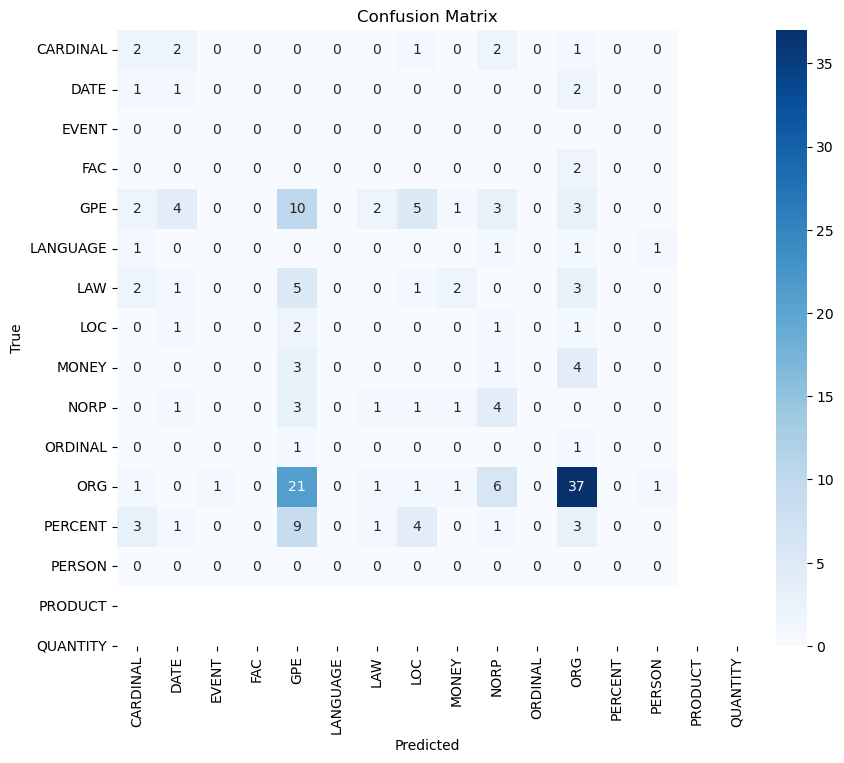

In [107]:
# Subsetting to Evaluate with Classification Reports and a Confusion matrix 

# Subsetting
hand_subset_6 = merged_hand_annotations_6[:180]
spacy_subset_6 = spacy_annotations_6[:180]

# Setting Ground Truth and Predictions
y_true_6 = [label for token, label in hand_subset_6]
y_pred_6 = [label for token, label in spacy_subset_6]

# Evaluation Reports
prec_score_micro_6 = precision_score(y_true_6, y_pred_6, average='micro')
prec_score_weighted_6 = precision_score(y_true_6, y_pred_6, average='weighted')

rec_score_micro_6 = recall_score(y_true_6, y_pred_6, average='micro')
rec_score_weighted_6 = recall_score(y_true_6, y_pred_6, average='weighted')

f1_score_micro_6 = f1_score(y_true_6, y_pred_6, average='micro')
f1_score_weighted_6 = f1_score(y_true_6, y_pred_6, average='weighted')


print("Doc 5 (SDCGKAC 1888 - Constitution) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS")
print()
print(f'Micro PRECISION score for subsets = {prec_score_micro_6}')
print(f'Weighted PRECISION score for subsets = {prec_score_weighted_6}')
print()
print(f'Micro RECALL score for subsets = {rec_score_micro_6}')
print(f'Weighted RECALL score for subsets = {rec_score_weighted_6}')
print()
print(f'Micro F1 score for subsets = {f1_score_micro_6}')
print(f'Weighted F1 score for subsets = {f1_score_weighted_6}')
print()

# Confusion Matrix
labels_6 = sorted(list(set(y_true_6 + y_pred_6)))
conf_matrix_6 = confusion_matrix(y_true_6, y_pred_6, labels=labels_6)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_6, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [108]:
# Evaluation Through Set Intersections and Differences 

ground_truth_set_6 = set(merged_hand_annotations_6)
spacy_predictions_set_6 = set(spacy_annotations_6)

true_positives_6 = ground_truth_set_6.intersection(spacy_predictions_set_6)

num_true_positives_6 = len(true_positives_6)
print('True Positives are when hand truth matches spacy predictions')
print(f"Number of True Positives: {num_true_positives_6}")
print()

for entity in true_positives_6:
    print(f"True Positive : {entity}")

True Positives are when hand truth matches spacy predictions
Number of True Positives: 27

True Positive : ('Tientsin', 'GPE')
True Positive : ('Shantung', 'GPE')
True Positive : ('million', 'CARDINAL')
True Positive : ('Shanghai', 'GPE')
True Positive : ('millions', 'CARDINAL')
True Positive : ('1892-93', 'DATE')
True Positive : ('two thousand', 'CARDINAL')
True Positive : ('720,000', 'CARDINAL')
True Positive : ('Peking', 'GPE')
True Positive : ('Chinese', 'NORP')
True Positive : ('Hankow', 'GPE')
True Positive : ('Empire', 'GPE')
True Positive : ('September', 'DATE')
True Positive : ('Japan', 'GPE')
True Positive : ('Europe', 'LOC')
True Positive : ('China', 'GPE')
True Positive : ('West', 'LOC')
True Positive : ('Glasgow', 'GPE')
True Positive : ('ten', 'CARDINAL')
True Positive : ('India', 'GPE')
True Positive : ('60,000', 'CARDINAL')
True Positive : ('France', 'GPE')
True Positive : ('Moukden', 'GPE')
True Positive : ('Chefoo', 'GPE')
True Positive : ('6,000', 'CARDINAL')
True Po